<a href="https://colab.research.google.com/github/susooo/data-analysis/blob/main/1_3_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**데이터프레임 결합**

###상하 결합

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [4, 5, 6], 'C' : [7, 8, 9]})
df2 = pd.DataFrame({'A' : [10, 11, 12], 'B' : [13, 14, 15], 'C' : [16, 17, 18]})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2])

In [ ]:
#인덱스 초기화
pd.concat([df1, df2], ignore_index = True)

In [ ]:
df3 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [4, 5, 6], 'C' : [7, 8, 9]})
df4 = pd.DataFrame({'A' : [10, 11, 12], 'B' : [13, 14, 15], 'C' : [16, 17, 18]})

In [ ]:
pd.concat([df3, df4])

In [ ]:
#합집합
pd.concat([df3, df4], join = 'outer')

In [ ]:
#교집합
pd.concat([df3, df4], join = 'inner')

###좌우 결합

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [4, 5, 6], 'C' : [7, 8, 9]})
df2 = pd.DataFrame({'E' : [10, 11, 12], 'F' : [13, 14, 15], 'G' : [16, 17, 18]})

In [ ]:
pd.concat([df1, df2], axis = 1)

In [ ]:
df1 = pd.DataFrame({'ID' : [1, 2, 3, 4, 5], '성별' : ['F', 'M', 'F', 'M', 'F'], '나이' : [20, 30, 40, 25, 42]})
df2 = pd.DataFrame({'ID' : [3, 4, 5, 6, 7], '키' : [160.5, 170.3, 180.1, 142.3, 153.7], '몸무게' : [45.1, 50.3, 72.1, 38,  42]})

In [ ]:
#왼쪽 df1의 ID를 기준으로 결합
pd.merge(df1, df2, how = 'left', on = 'ID')

In [ ]:
#오른쪽 df2의 ID를 기준으로 결합
pd.merge(df1, df2, how = 'right', on = 'ID')

In [ ]:
#NaN이 없는 데이터만
pd.merge(df1, df2, how = 'inner', on = 'ID')

In [ ]:
#모든 데이터
pd.merge(df1, df2, how = 'outer', on = 'ID')

In [ ]:
df1 = pd.DataFrame({'USER_ID' : [1, 2, 3, 4, 5], '성별' : ['F', 'M', 'F', 'M', 'F'], '나이' : [20, 30, 40, 25, 42]})
df2 = pd.DataFrame({'ID' : [3, 4, 5, 6, 7], '키' : [160.5, 170.3, 180.1, 142.3, 153.7], '몸무게' : [45.1, 50.3, 72.1, 38,  42]})

In [ ]:
#df1의 기준열은 USER_ID, df2의 기준열은 ID
pd.merge(df1, df2, how = 'outer', left_on = 'USER_ID', right_on = 'ID')

In [ ]:
#df1의 기준열은 USER_ID, df2의 기준열은 키
pd.merge(df1, df2, how = 'outer', left_on = 'USER_ID', right_on = '키')

#**그룹화**

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'ID' : [1, 2, 3, 4, 5], '가입일' : ['2021-01-02', '2021-01-04', '2021-01-10', '2021-02-10', '2021-02-24'], '성별' : ['F', 'M', 'F', 'M', 'M']})
df2 = pd.DataFrame({'구매순서' : [1, 2, 3, 4, 5], 'ID' : [1, 1, 2, 4, 1], '구매월' : [1, 1, 2, 2, 3], '금액' : [1000, 1500, 2000, 3000, 4000]})

In [ ]:
pd.merge(df1, df2, how = 'left', on = 'ID')

In [ ]:
#ID별 누적금액
df2.groupby(by = ['ID'])['금액'].sum()

In [ ]:
#groupby의 결과의 타입은 series
type(df2.groupby(by = ['ID'])['금액'].sum())

In [ ]:
#ID의 구매별 누적금액
s2 = df2.groupby(by = ['ID', '구매월'])['금액'].sum()

In [ ]:
s2

In [ ]:
#구매월 merge 되지 않음
pd.merge(df1, s2, how = 'left', on = 'ID')

In [ ]:
#groupby 기준을 인덱스로 사용하지 않으면 해결 -> as_index = False
df3 = df2.groupby(by = ['ID', '구매월'], as_index = False)['금액'].sum()

In [ ]:
df3

In [ ]:
pd.merge(df1, df3, how = 'left', on = 'ID')

In [ ]:
df = pd.DataFrame({'구매순서' : [1, 2, 3, 4, 5], 'ID' : [1, 1, 2, 4, 1], '구매월' : [1, 1, 2, 2, 3], '금액' : [1000, 1500, 2000, 3000, 4000], '수수료' : [100, 150, 200, 300, 400]})

In [ ]:
#적용 함수가 여러개인 경우
df2 = df.groupby(by = ['ID'])['금액'].agg([sum, len])

In [ ]:
#적용함수가 여러개인 경우 as_index = False 대신 다음의 코드를 진행한다.
df2.reset_index(inplace = True)

In [ ]:
pd.merge(df, df2, how = 'left', on = 'ID')

In [ ]:
df3 = df.groupby(by = ['ID']).agg({'금액' : [max, min], '수수료' : min})

In [ ]:
df3.reset_index(inplace=True)

In [ ]:
df3

In [ ]:
df3.columns.values

In [ ]:
#칼럼 명 변경
df3.columns = ['_'.join(col) for col in df3.columns.values]

In [ ]:
df3

In [ ]:
df3.rename(columns={'ID_':'ID'}, inplace=True)

In [ ]:
pd.merge(df, df3, how = 'left', on = 'ID') 

#**피벗테이블**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({'가입월' : [1, 1, 1, 2, 2, 3], '탈퇴월' : [1, 2, 3, 2, 3, 3], '탈퇴회원수' : [101, 52, 30, 120, 60, 130]})

In [ ]:
#피벳 테이블 만들기
pivot = pd.pivot_table(df, values = '탈퇴회원수' , index = ['가입월'], columns = ['탈퇴월'])

In [ ]:
pivot

In [ ]:
#피벳 테이블 만들기, NaN 값 0으로 대체하기
pd.pivot_table(df, values = '탈퇴회원수' , index = ['가입월'], columns = ['탈퇴월'], fill_value = 0 )

In [ ]:
#과일 품목과 크기 데이터프레임 만들기
import random

a = []
b = []

for i in range(10):
    a.append(random.randint(1,3))
    b.append(random.randint(1,3))

In [ ]:
df = pd.DataFrame({'품목' : a, '크기' : b})

In [ ]:
#품목과 크기별로 판매금액과 수수료 칼럼 추가하기
df['금액'] = df['품목'] * df['크기'] * 500
df['수수료'] = df['금액'] * 0.1

In [ ]:
df

In [ ]:
#map함수로 데이터 변환
fruit_name = {1 : '토마토', 2 : '바나나', 3 : '사과'}
fruit_size = {1 : '소', 2 : '중', 3 : '대'}

df['품목'] = df['품목'].map(fruit_name)
df['크기'] = df['크기'].map(fruit_size)

In [ ]:
df

In [ ]:
#품목과 크기별 품목 개수와 합계 피벗 테이블 만들기
pd.pivot_table(df, values = '금액', index = ['품목'], columns = ['크기'], aggfunc = ( 'count', 'sum'))

In [ ]:
pd.pivot_table(df, index = ['품목'], columns = ['크기'], aggfunc = {'금액' : ['count', 'sum'], '수수료' : 'sum'})

#**파일 호출**

In [ ]:
#코랩과 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
#파일 호출
#해당 파일이 데이터프레임 형태로 들어옴

#df = pd.read_csv('파일 경로')

In [ ]:
#처음부터 5행 데이터 출력

#df.head()

In [ ]:
#뒤에서부터 5행 데이터 출력

#df.tail()

In [ ]:
#첫 번째 열을 인덱스로 사용하고 싶은 경우 

#df = pd.read_csv('파일 경로', index_col=0)

In [ ]:
#다른 기호로 구분자가 사용된 파일인 경우

#df = pd.read_csv('파일 경로', index_col=0, sep='구분자')

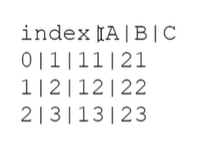

In [ ]:
#헤더가 여러줄인 경우 ->1까지가 헤더라는 걸을 의미

#df = pd.read_csv('파일 경로', index_col=0, header=1)

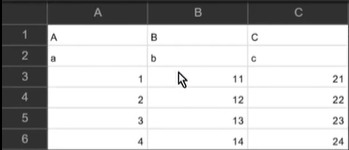

In [ ]:
#데이터만 존재하고 칼럼명이 없는 경우

#df = pd.read_csv('파일 경로', index_col=0, index_col=0, names = ['칼럼명1', '칼럼명2', '칼럼명3'])

In [ ]:
#원한는 칼럼 데이터만 사용하고 싶은 경우

#df = pd.read_csv('파일 경로', index_col=0, usecols=['칼럼명1', '칼럼명2'])

In [ ]:
#파일 저장하기

#df.to_csv('파일 경로')